Analiza danych o napiwkach w restauracji – eksploracja i wnioski

In [12]:
import seaborn as sns

df = sns.load_dataset("tips")

Polecenia:
Wyświetl podstawowe informacje o zbiorze (df.info(), df.describe()), sprawdź brakujące wartości.

Oblicz średnią wartość rachunku i napiwków z podziałem na dzień tygodnia i płeć (groupby + agg).

Utwórz kolumnę tip_rate = tip / total_bill i oblicz średni procent napiwku dla różnych pór dnia (day, time).

Narysuj wykres punktowy pokazujący zależność między total_bill a tip_rate, z kolorem oznaczającym płeć.

Odpowiedz w Markdown:

Czy poziom napiwków różni się istotnie w weekendy?

Która grupa klientów zostawia wyższe napiwki w procentach?

In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [17]:
# sprawdzenie brakujacych wartosci
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [22]:
# srednie wartosci
grouped = df.groupby(['day', 'sex'], observed=True).agg({
    'total_bill': 'mean',
    'tip': 'mean'
}).round(2)  # zaokraglenie wynikow do 2
print(grouped)

             total_bill   tip
day  sex                     
Thur Male         18.71  2.98
     Female       16.72  2.58
Fri  Male         19.86  2.69
     Female       14.15  2.78
Sat  Male         20.80  3.08
     Female       19.68  2.80
Sun  Male         21.89  3.22
     Female       19.87  3.37


In [28]:
df['tip_rate'] = (df['tip'] / df['total_bill'] * 100).round(2)
print(df.iloc[1])
print(df)

total_bill     10.34
tip             1.66
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
tip_rate       16.05
Name: 1, dtype: object
     total_bill   tip     sex smoker   day    time  size  tip_rate
0         16.99  1.01  Female     No   Sun  Dinner     2      5.94
1         10.34  1.66    Male     No   Sun  Dinner     3     16.05
2         21.01  3.50    Male     No   Sun  Dinner     3     16.66
3         23.68  3.31    Male     No   Sun  Dinner     2     13.98
4         24.59  3.61  Female     No   Sun  Dinner     4     14.68
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3     20.39
240       27.18  2.00  Female    Yes   Sat  Dinner     2      7.36
241       22.67  2.00    Male    Yes   Sat  Dinner     2      8.82
242       17.82  1.75    Male     No   Sat  Dinner     2      9.82
243       18.78  3.00  Female     No  Thur  Dinner     2     15.97

[244

In [31]:
tips_rate_by_day_time = df.groupby(['day', 'time'], observed=True).agg({'tip_rate': 'mean'}).round(2)
print(tips_rate_by_day_time)

             tip_rate
day  time            
Thur Lunch      16.13
     Dinner     15.97
Fri  Lunch      18.88
     Dinner     15.89
Sat  Dinner     15.31
Sun  Dinner     16.69


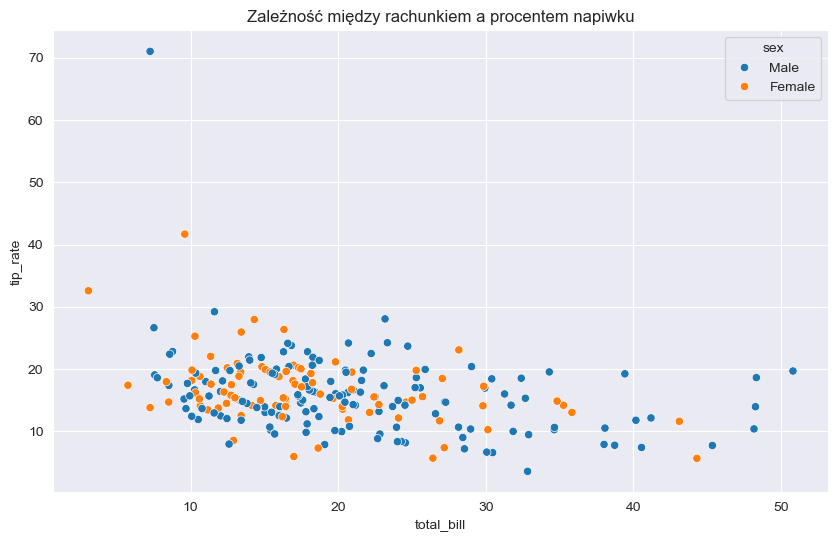

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip_rate', hue='sex')
plt.title('Zależność między rachunkiem a procentem napiwku')
plt.show()

In [63]:
days = df['day'].unique()
print(days)

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


In [65]:
weekend_tip_rate = df[df['day'].isin(['Sat', 'Sun'])]['tip_rate'].mean()
print(f"{weekend_tip_rate:.2f}")

15.96


Średnia wartość napiwków w weekendy to 15.96

In [68]:
#workday_tip_rate = df[df['day'].isin(['Thur', 'Fri'])]['tip_rate'].mean()
workday_tip_rate = df[~df['day'].isin(['Sat', 'Sun'])]['tip_rate'].mean()
print(f"{workday_tip_rate:.2f}")

16.33


Średnia wartość napiwków w dni robocze to 16.33

In [76]:
#gender_tip_rate = df.groupby('sex', observed=True)['tip_rate'].mean().round(2)
gender_tip_rate = df.groupby('sex', observed=True).agg({'tip_rate': 'mean'}).round(2)
print(gender_tip_rate)

        tip_rate
sex             
Male       15.76
Female     16.65


Wyższe napiwiki zostawiają kobiety